In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Notes:

    - both datasets are missing some zipcode values (null) - I will populate with 0.
    
    - might be useful to break apart the dates into months?

### Load the COVID test result counts by zip

In [4]:
covid_count = pd.read_csv('../data/COVID_CountByZipPerDate_03292021.csv')

In [58]:
covid_count.dtypes 

Specimen Collection Date     object
Zip                         float64
Cases                         int64
dtype: object

#### Process to Change zip to int64:
1. FIll in the Nulls using df = df.fillna(0)
2. df['DataFrame Column'] = df['DataFrame Column'].astype(int)

In [61]:
covid_count=covid_count.fillna(0)

In [64]:
covid_count['Zip'] = covid_count['Zip'].astype(int) #df['DataFrame Column'] = df['DataFrame Column'].astype(int)

In [65]:
covid_count.head(5)

,Specimen Collection Date,Zip,Cases
0,3/6/2020,37217,1
1,3/10/2020,37214,1
2,3/11/2020,37013,1
3,3/11/2020,37204,2
4,3/11/2020,37205,1


In [8]:
max(covid_count['Cases'])

272

In [29]:
covid_count.Cases.sum()

93619

In [9]:
covid_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8832 entries, 0 to 8831
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Specimen Collection Date  8832 non-null   object 
 1   Zip                       8456 non-null   float64
 2   Cases                     8832 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 207.1+ KB


In [63]:
covid_count.isnull().sum()
#This now indicates I covered all my null Zips

Specimen Collection Date    0
Zip                         0
Cases                       0
dtype: int64

In [13]:
covid_count['Specimen Collection Date'].value_counts()

12/7/2020     31
12/28/2020    30
11/17/2020    30
12/9/2020     30
12/14/2020    30
              ..
3/12/2020      8
3/11/2020      7
4/5/2020       7
3/10/2020      1
3/6/2020       1
Name: Specimen Collection Date, Length: 384, dtype: int64

In [67]:
covid_count.describe()
#indicates no days with 0 cases
#indicates max day with 272 cases

,Zip,Cases
count,8832.000000,8832.000000
mean,35595.081295,10.599977
std,7506.543963,15.487583
min,0.000000,1.000000
25%,37138.000000,2.000000
50%,37207.000000,5.000000
75%,37214.000000,13.000000
max,37238.000000,272.000000


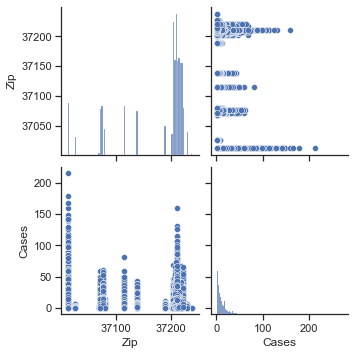

In [16]:
#set the seaborn theme, style, color palette
sns.set(style="ticks", color_codes=True)

#make a correlation plot that looks at each variables relationship with every other variable
#and plots the distribution of each variable along the diagonal
sns.pairplot(covid_count);

In [72]:
#plt.plot('cases', 'zip')
#this is not working: valueerror `Unrecognized character z in format string`

### Bring in the vaccination data

In [39]:
vaccines = pd.read_csv('../data/vaccine_with_protocol.csv')

In [40]:
vaccines.head()

,vacc_date,zipcode,count_given,dose_nbr,protocol
0,2020-12-12,37215.0,1.0,1.0,two-shot
1,2020-12-14,37205.0,1.0,2.0,two-shot
2,2020-12-14,37215.0,1.0,1.0,two-shot
3,2020-12-15,37221.0,1.0,1.0,two-shot
4,2020-12-16,37215.0,1.0,1.0,two-shot


In [44]:
vaccines.tail()

,vacc_date,zipcode,count_given,dose_nbr,protocol
6689,2021-04-07,37228.0,9.0,1.0,two-shot
6690,2021-04-07,37228.0,2.0,2.0,two-shot
6691,2021-04-07,NaN,8.0,1.0,two-shot
6692,2021-04-07,NaN,1.0,1.0,one-shot
6693,2021-04-07,NaN,7.0,2.0,two-shot


In [69]:
vaccines.isnull().sum()

vacc_date      0
zipcode        0
count_given    8
dose_nbr       8
protocol       0
dtype: int64

In [71]:
vaccines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6694 entries, 0 to 6693
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   vacc_date    6694 non-null   object 
 1   zipcode      6694 non-null   int64  
 2   count_given  6686 non-null   float64
 3   dose_nbr     6686 non-null   float64
 4   protocol     6694 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 261.6+ KB


Convert Zip to int

In [68]:
vaccines.zipcode = vaccines.zipcode.fillna(value=0)

In [70]:
vaccines.zipcode = vaccines.zipcode.astype(int)